In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.slim as slim
from skimage import io
from tensorflow.examples.tutorials.mnist import input_data
import math
from dataset import Dataset
%matplotlib inline

In [5]:
def zoomUnit(act,indexFilter):
    return act[0,:,:,indexFilter]

def showAllFilters(act):
    print "Plotting layer with shape ",act.shape
    nFilters = act.shape[3]


    filter = 0
    rows = int(np.ceil(nFilters*1.0/5))
    print rows
    for i in range(rows):
        fig, grid = plt.subplots(1, 5)
        for j in range(5):
            if filter >= nFilters:
                break
            grid[j].imshow(act[0,:,:,filter],interpolation='none')
            filter+=1

In [8]:
#Load image
from dataset import grayscaleEq
dataset = Dataset("data/BselineOuterInner", batch_size=20)
#pathImageTest = "data/Scalograms/1d0_0.jpg"

#Load image and prepare for input
#imageToUse= grayscaleEq(io.imread(pathImageTest))
#imageToUse = dataset.normalizeImage(imageToUse)
#plt.imshow(imageToUse, interpolation="nearest")
#imageToUse = imageToUse.reshape((1, 96, 96, 1))

Plotting layer with shape  (1, 96, 96, 64)
13
Output layer  [[  2.41172981  15.64016247]]


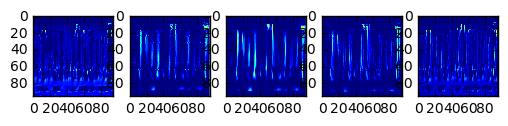

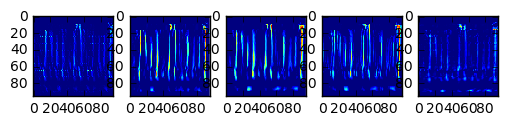

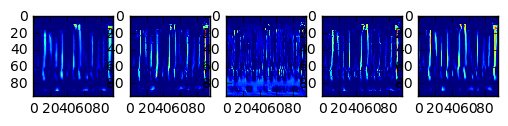

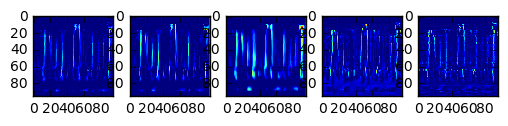

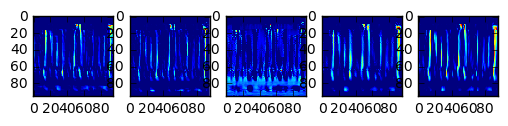

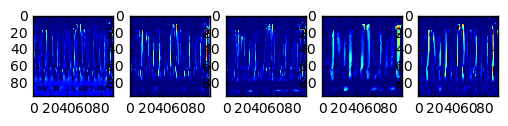

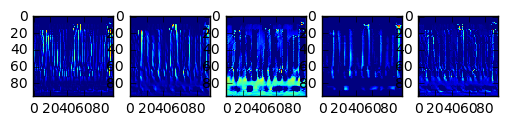

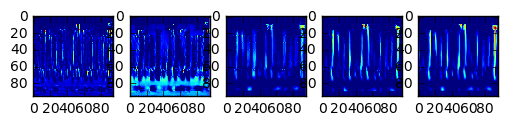

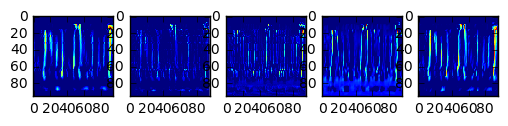

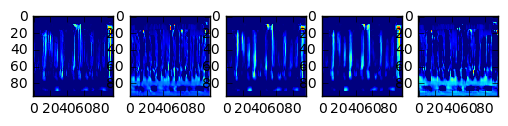

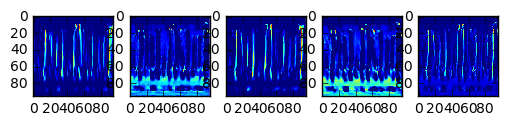

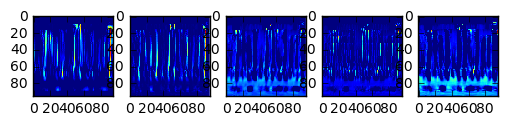

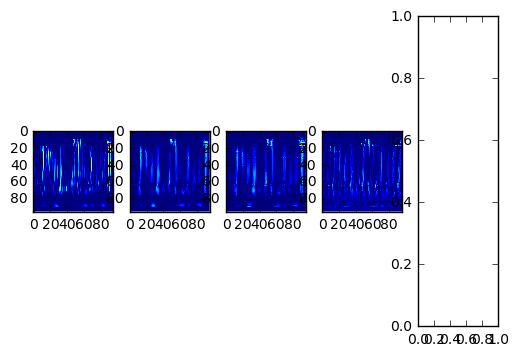

In [19]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('savedModels/my-model.meta')
    new_saver.restore(sess, 'savedModels/my-model')
    md = sess.graph.get_tensor_by_name('model_input:0')
    kp = sess.graph.get_tensor_by_name('dropout_prob:0')

    #Layer visualization
    tosee = 'conv1/Relu:0'
    unit = sess.graph.get_tensor_by_name(tosee)

    v_ = sess.run((unit), feed_dict={md: imageToUse,kp:1.0})
    showAllFilters(v_)

    #Output layer
    ot = sess.run((sess.graph.get_tensor_by_name('fc2/Relu:0')), feed_dict={md: imageToUse,kp:1.0})
    print "Output layer ",ot

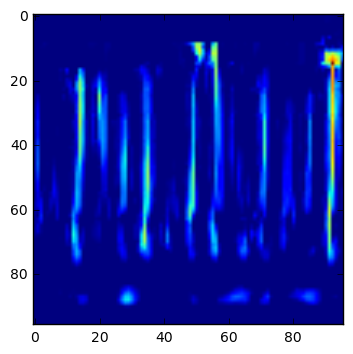

In [20]:
plt.figure()
plt.imshow(zoomUnit(v_,2))

ateSpeed/89.jpg score [[  2.71671068e+13   4.79808287e+13]] predicted Baseline
teSpeed/240.jpg score [[  2.05785032e+13   3.42721424e+13]] predicted Baseline
teSpeed/574.jpg score [[  4.08156572e+13   6.51612515e+13]] predicted Baseline
teSpeed/811.jpg score [[  2.23251918e+13   3.55992097e+13]] predicted Baseline
teSpeed/891.jpg score [[  3.16278728e+13   4.72591022e+13]] predicted Baseline
teSpeed/168.jpg score [[  3.06479807e+13   5.04186421e+13]] predicted Baseline
teSpeed/380.jpg score [[  3.65040595e+13   6.33197298e+13]] predicted Baseline
teSpeed/167.jpg score [[  2.66998760e+13   4.33021035e+13]] predicted Baseline
teSpeed/436.jpg score [[  2.64607944e+13   4.80369611e+13]] predicted Baseline
teSpeed/782.jpg score [[  3.15590317e+13   4.86829929e+13]] predicted Baseline
teSpeed/378.jpg score [[  3.16203797e+13   5.67459552e+13]] predicted Baseline
teSpeed/169.jpg score [[  2.34803199e+13   4.50716175e+13]] predicted Baseline
teSpeed/893.jpg score [[  1.62169209e+13   2.7554989

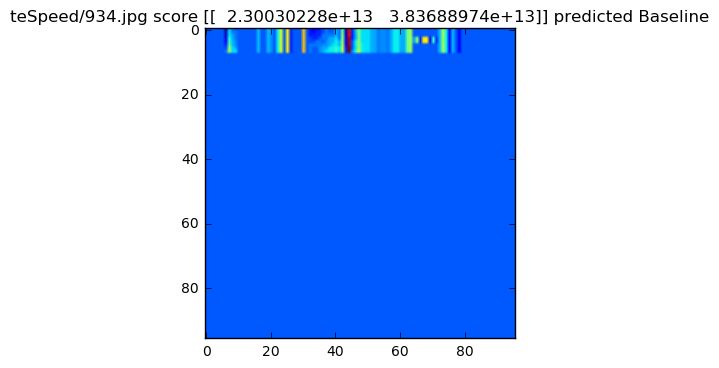

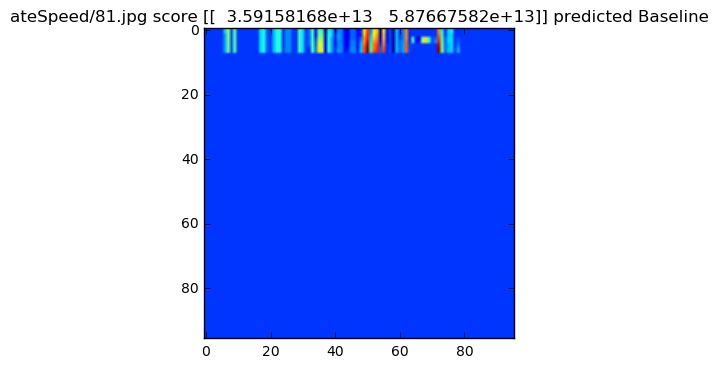

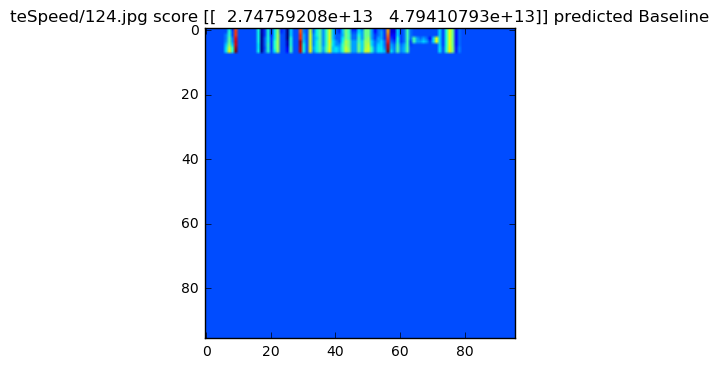

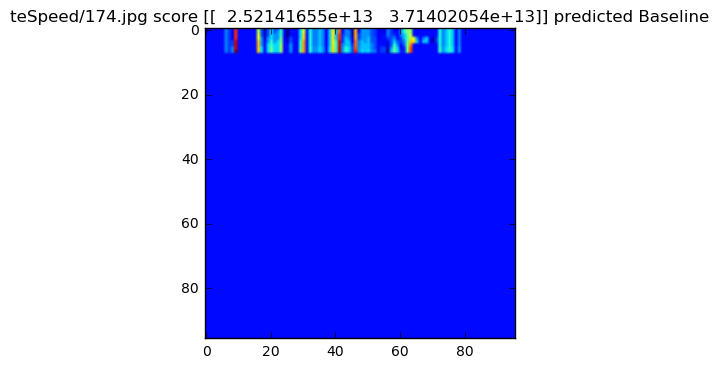

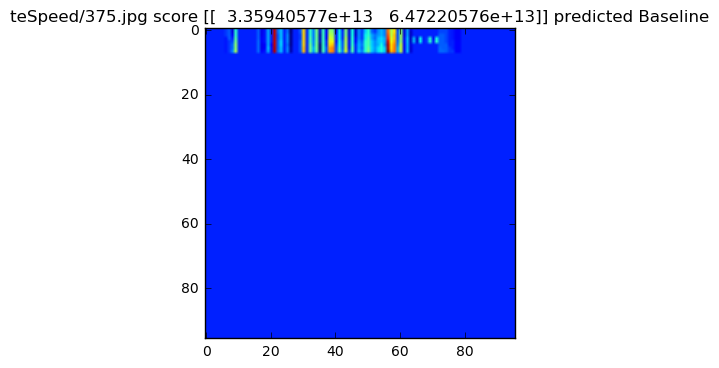

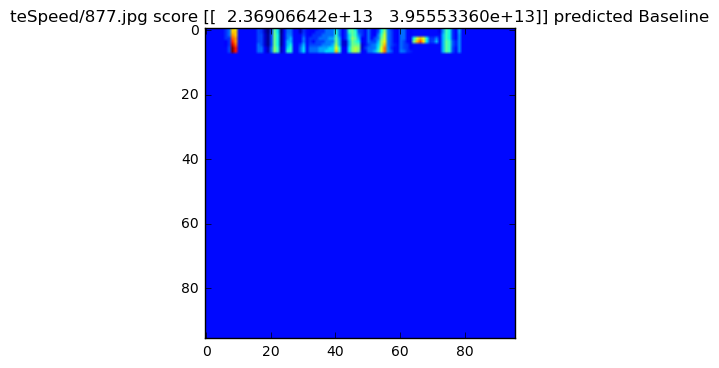

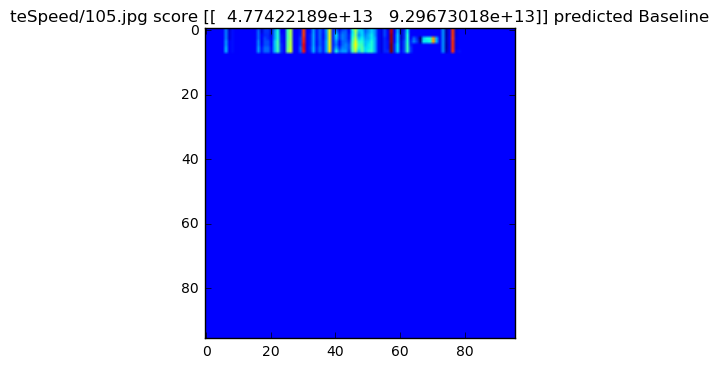

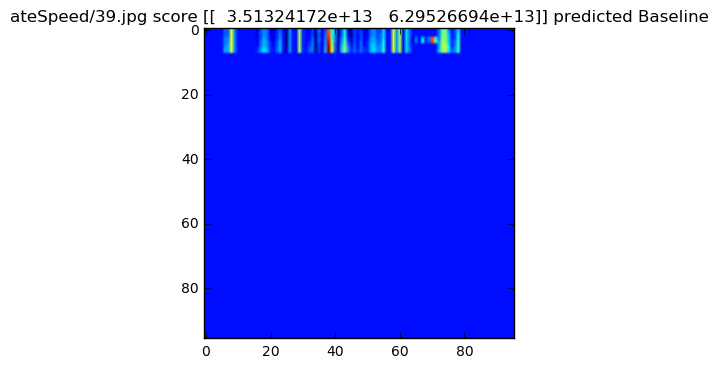

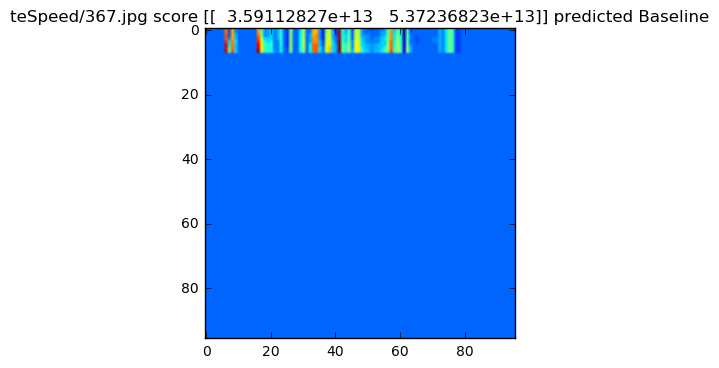

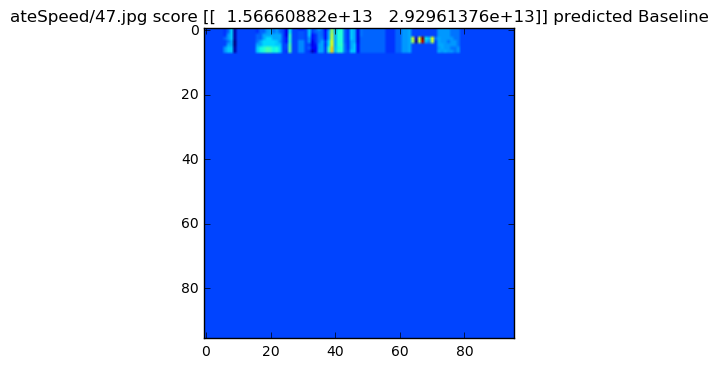

In [7]:
#Clasify examples in folder

import os
limitImages = 10
cn = {0 : "Inner", 1: "Baseline", 2 : "Outer"}

with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('savedModels/BselineOuterInner.meta')
    new_saver.restore(sess, 'savedModels/BselineOuterInner')
    md = sess.graph.get_tensor_by_name('model_input:0')
    kp = sess.graph.get_tensor_by_name('dropout_prob:0')



    folderName = 'data/6 - Real World Examples'
    #Get file names
    files= [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(folderName)) for f in fn]
    for fname in files:
        if fname.split(".")[-1] == 'jpg':
            imageQuery = grayscaleEq(io.imread(fname)) #Open images
            imageQuery = dataset.normalizeImage(imageQuery) #Normalize images
            imageQuery = imageQuery.reshape((1, 96, 96, 1))
            
            ot = sess.run((sess.graph.get_tensor_by_name('fc2/Relu:0')), feed_dict={md: imageQuery,kp:1.0}) #PREDICT
            title = fname[-15:]+" score "+str(ot)+" predicted "+cn[np.argmax(ot)]
            if limitImages > 0:
                limitImages -=1
                plt.figure()
                plt.title(title)  #Show filename --- scores ---- predicted
                plt.imshow(imageQuery.reshape((96,96)))
            else:
                print title

In [8]:
#derp